In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
# learning parameters
batch_size = 128
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 64 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=64, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1,

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0001)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0001)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

469it [00:24, 19.12it/s]                         


Epoch 1 of 100
Generator loss: 2.05672962, Discriminator loss: 0.47040266


469it [00:19, 24.58it/s]                         


Epoch 2 of 100
Generator loss: 2.60279408, Discriminator loss: 0.53171856


469it [00:18, 25.65it/s]                         


Epoch 3 of 100
Generator loss: 1.56875144, Discriminator loss: 0.53174742


469it [00:18, 25.55it/s]                         


Epoch 4 of 100
Generator loss: 3.12979341, Discriminator loss: 0.33134024


469it [00:19, 24.60it/s]                         


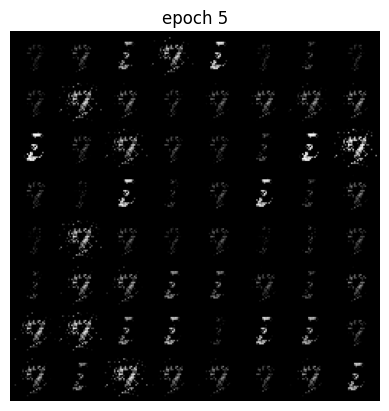

Epoch 5 of 100
Generator loss: 3.84051914, Discriminator loss: 0.28358802


469it [00:19, 23.61it/s]                         


Epoch 6 of 100
Generator loss: 4.50324450, Discriminator loss: 0.26140355


469it [00:18, 25.90it/s]                         


Epoch 7 of 100
Generator loss: 4.74122261, Discriminator loss: 0.26608829


469it [00:18, 25.61it/s]                         


Epoch 8 of 100
Generator loss: 5.15975326, Discriminator loss: 0.26497247


469it [00:17, 26.43it/s]                         


Epoch 9 of 100
Generator loss: 5.09942218, Discriminator loss: 0.26637118


469it [00:17, 26.55it/s]                         


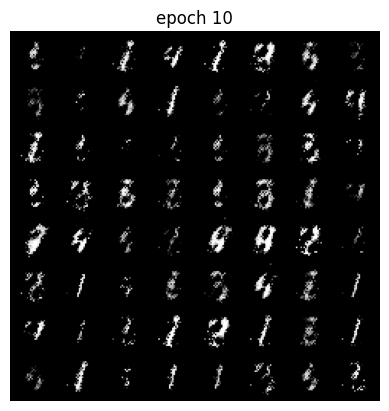

Epoch 10 of 100
Generator loss: 4.98523428, Discriminator loss: 0.26735176


469it [00:18, 24.93it/s]


Epoch 11 of 100
Generator loss: 4.80671856, Discriminator loss: 0.26491625


469it [00:18, 25.86it/s]                         


Epoch 12 of 100
Generator loss: 4.91090748, Discriminator loss: 0.27140442


469it [00:18, 25.13it/s]                         


Epoch 13 of 100
Generator loss: 4.42042307, Discriminator loss: 0.29133988


469it [00:18, 24.77it/s]                         


Epoch 14 of 100
Generator loss: 4.33015987, Discriminator loss: 0.30263076


469it [00:17, 26.09it/s]


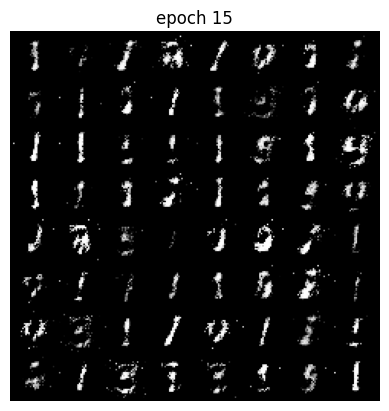

Epoch 15 of 100
Generator loss: 3.58606245, Discriminator loss: 0.34538296


469it [00:18, 25.80it/s]                         


Epoch 16 of 100
Generator loss: 3.52149683, Discriminator loss: 0.33621169


469it [00:18, 24.91it/s]                         


Epoch 17 of 100
Generator loss: 3.29636574, Discriminator loss: 0.34751799


469it [00:18, 25.02it/s]                         


Epoch 18 of 100
Generator loss: 3.14605653, Discriminator loss: 0.35788941


469it [00:18, 26.01it/s]                         


Epoch 19 of 100
Generator loss: 2.96450975, Discriminator loss: 0.37746972


469it [00:18, 24.94it/s]                         


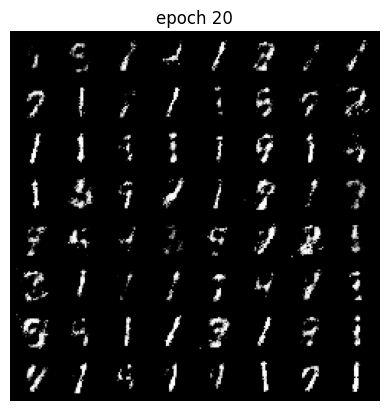

Epoch 20 of 100
Generator loss: 2.95874964, Discriminator loss: 0.37738113


469it [00:18, 25.11it/s]                         


Epoch 21 of 100
Generator loss: 2.83572658, Discriminator loss: 0.37769374


469it [00:18, 25.76it/s]                         


Epoch 22 of 100
Generator loss: 2.83478626, Discriminator loss: 0.38801433


469it [00:18, 25.56it/s]                         


Epoch 23 of 100
Generator loss: 2.76170408, Discriminator loss: 0.39158540


469it [00:19, 24.44it/s]                         


Epoch 24 of 100
Generator loss: 2.68641124, Discriminator loss: 0.40781339


469it [00:18, 25.55it/s]                         


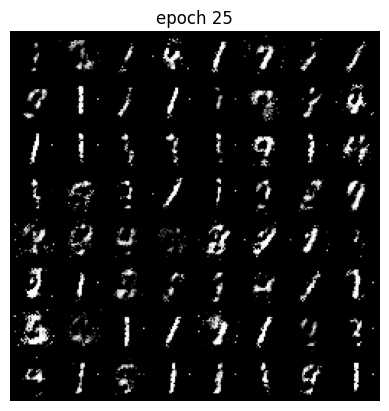

Epoch 25 of 100
Generator loss: 2.64127098, Discriminator loss: 0.39772730


469it [00:18, 25.03it/s]


Epoch 26 of 100
Generator loss: 2.72156386, Discriminator loss: 0.40297028


469it [00:19, 23.63it/s]                         


Epoch 27 of 100
Generator loss: 2.84878011, Discriminator loss: 0.39684493


469it [00:18, 25.42it/s]                         


Epoch 28 of 100
Generator loss: 2.55913502, Discriminator loss: 0.40967940


469it [00:19, 24.51it/s]                         


Epoch 29 of 100
Generator loss: 2.56928650, Discriminator loss: 0.40868022


469it [00:19, 24.27it/s]                         


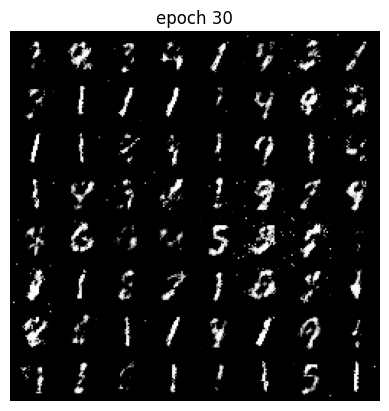

Epoch 30 of 100
Generator loss: 2.41292165, Discriminator loss: 0.42336262


469it [00:19, 24.61it/s]


Epoch 31 of 100
Generator loss: 2.42247502, Discriminator loss: 0.42753312


469it [00:19, 24.45it/s]                         


Epoch 32 of 100
Generator loss: 2.50353615, Discriminator loss: 0.42056202


469it [00:19, 24.39it/s]                         


Epoch 33 of 100
Generator loss: 2.29408460, Discriminator loss: 0.43517833


469it [00:19, 24.63it/s]


Epoch 34 of 100
Generator loss: 2.35626673, Discriminator loss: 0.43693563


469it [00:19, 24.27it/s]                         


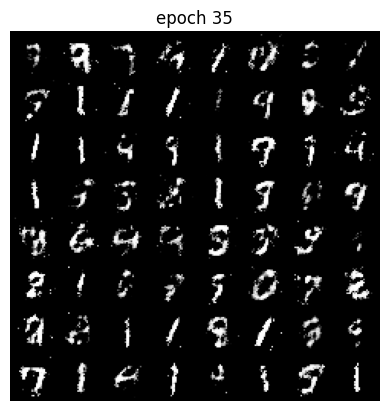

Epoch 35 of 100
Generator loss: 2.19900540, Discriminator loss: 0.45076607


469it [00:19, 24.25it/s]


Epoch 36 of 100
Generator loss: 2.30142987, Discriminator loss: 0.43754690


469it [00:19, 24.55it/s]


Epoch 37 of 100
Generator loss: 2.23064980, Discriminator loss: 0.45102542


469it [00:19, 24.22it/s]


Epoch 38 of 100
Generator loss: 2.34238705, Discriminator loss: 0.44095937


469it [00:19, 24.05it/s]                         


Epoch 39 of 100
Generator loss: 2.28011506, Discriminator loss: 0.45274678


469it [00:19, 24.31it/s]


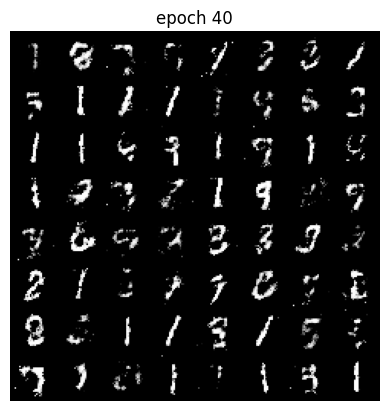

Epoch 40 of 100
Generator loss: 2.08054416, Discriminator loss: 0.46020450


469it [00:21, 22.31it/s]                         


Epoch 41 of 100
Generator loss: 2.08720429, Discriminator loss: 0.46169423


469it [00:19, 24.18it/s]                         


Epoch 42 of 100
Generator loss: 2.02898371, Discriminator loss: 0.47358551


469it [00:19, 24.15it/s]                         


Epoch 43 of 100
Generator loss: 2.02997753, Discriminator loss: 0.47245759


469it [00:20, 22.71it/s]


Epoch 44 of 100
Generator loss: 1.92036310, Discriminator loss: 0.48250502


469it [00:19, 24.59it/s]


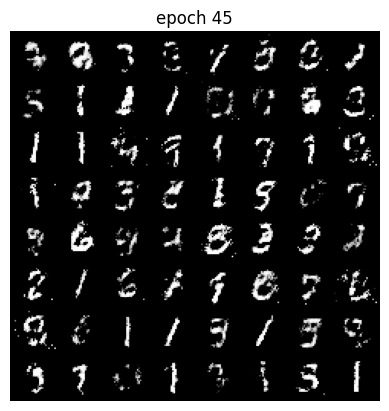

Epoch 45 of 100
Generator loss: 1.88991845, Discriminator loss: 0.49398188


469it [00:19, 23.74it/s]


Epoch 46 of 100
Generator loss: 1.92384234, Discriminator loss: 0.48116208


469it [00:19, 24.05it/s]                         


Epoch 47 of 100
Generator loss: 1.89434728, Discriminator loss: 0.48976936


469it [00:19, 24.22it/s]                         


Epoch 48 of 100
Generator loss: 1.87158795, Discriminator loss: 0.49436753


469it [00:19, 23.68it/s]


Epoch 49 of 100
Generator loss: 1.83544390, Discriminator loss: 0.50496705


469it [00:19, 23.91it/s]                         


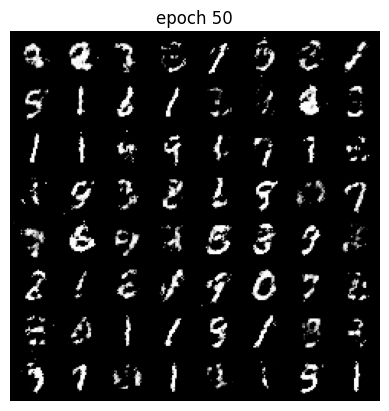

Epoch 50 of 100
Generator loss: 1.84256961, Discriminator loss: 0.49398885


469it [00:18, 24.75it/s]                         


Epoch 51 of 100
Generator loss: 1.77432375, Discriminator loss: 0.50833532


469it [00:19, 23.98it/s]


Epoch 52 of 100
Generator loss: 1.77240677, Discriminator loss: 0.50801867


469it [00:19, 23.92it/s]


Epoch 53 of 100
Generator loss: 1.76876834, Discriminator loss: 0.50688610


469it [00:19, 24.27it/s]


Epoch 54 of 100
Generator loss: 1.74115891, Discriminator loss: 0.51086471


469it [00:20, 22.43it/s]                         


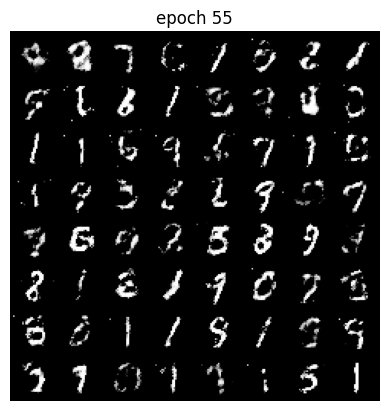

Epoch 55 of 100
Generator loss: 1.70781625, Discriminator loss: 0.51898363


469it [00:19, 24.29it/s]                         


Epoch 56 of 100
Generator loss: 1.72759712, Discriminator loss: 0.51092232


469it [00:19, 24.02it/s]


Epoch 57 of 100
Generator loss: 1.69999124, Discriminator loss: 0.52115822


469it [00:20, 23.30it/s]                         


Epoch 58 of 100
Generator loss: 1.66951171, Discriminator loss: 0.52570829


469it [00:19, 24.43it/s]


Epoch 59 of 100
Generator loss: 1.63190562, Discriminator loss: 0.52914410


469it [00:19, 23.87it/s]                         


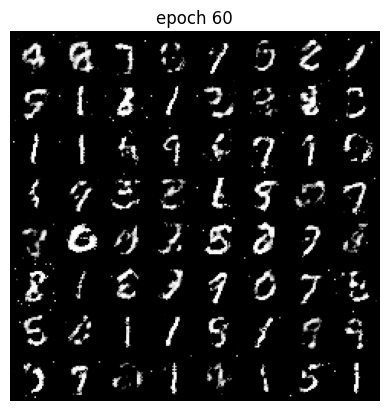

Epoch 60 of 100
Generator loss: 1.61274251, Discriminator loss: 0.53105372


469it [00:20, 23.33it/s]                         


Epoch 61 of 100
Generator loss: 1.56481327, Discriminator loss: 0.53718995


469it [00:19, 24.21it/s]


Epoch 62 of 100
Generator loss: 1.54242935, Discriminator loss: 0.54119312


469it [00:20, 22.83it/s]


Epoch 63 of 100
Generator loss: 1.51651122, Discriminator loss: 0.54317292


469it [00:19, 23.71it/s]                         


Epoch 64 of 100
Generator loss: 1.55290159, Discriminator loss: 0.54452782


469it [00:19, 23.96it/s]                         


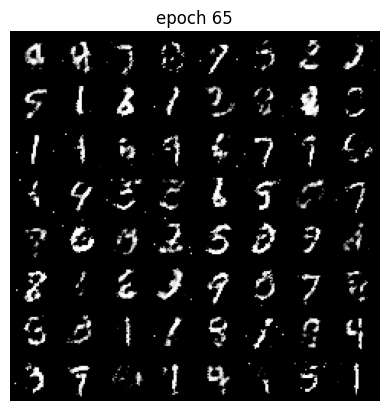

Epoch 65 of 100
Generator loss: 1.52281158, Discriminator loss: 0.54829130


469it [00:20, 22.51it/s]                         


Epoch 66 of 100
Generator loss: 1.46301514, Discriminator loss: 0.54903461


469it [00:19, 23.94it/s]


Epoch 67 of 100
Generator loss: 1.47889851, Discriminator loss: 0.55367452


469it [00:19, 24.02it/s]                         


Epoch 68 of 100
Generator loss: 1.45356590, Discriminator loss: 0.55957758


469it [00:20, 22.59it/s]                         


Epoch 69 of 100
Generator loss: 1.40820903, Discriminator loss: 0.56172800


469it [00:20, 23.35it/s]                         


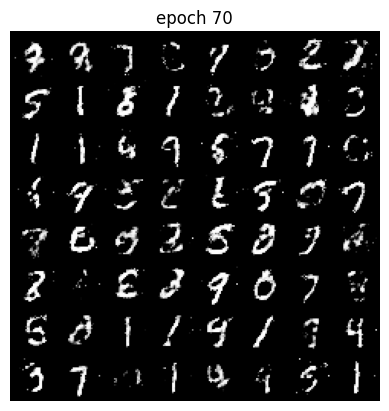

Epoch 70 of 100
Generator loss: 1.40958949, Discriminator loss: 0.56060771


469it [00:20, 22.94it/s]


Epoch 71 of 100
Generator loss: 1.41957819, Discriminator loss: 0.56777974


469it [00:20, 23.08it/s]                         


Epoch 72 of 100
Generator loss: 1.39046679, Discriminator loss: 0.56989969


469it [00:19, 23.47it/s]                         


Epoch 73 of 100
Generator loss: 1.36445482, Discriminator loss: 0.57101707


469it [00:21, 22.30it/s]                         


Epoch 74 of 100
Generator loss: 1.39568921, Discriminator loss: 0.56712492


469it [00:19, 23.78it/s]                         


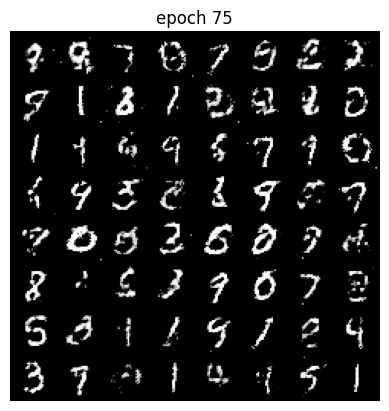

Epoch 75 of 100
Generator loss: 1.39589477, Discriminator loss: 0.56564381


469it [00:20, 23.34it/s]                         


Epoch 76 of 100
Generator loss: 1.36939478, Discriminator loss: 0.57499967


469it [00:21, 22.32it/s]


Epoch 77 of 100
Generator loss: 1.32767168, Discriminator loss: 0.57872156


469it [00:19, 24.14it/s]


Epoch 78 of 100
Generator loss: 1.32749653, Discriminator loss: 0.57557459


469it [00:20, 22.87it/s]                         


Epoch 79 of 100
Generator loss: 1.34264703, Discriminator loss: 0.57928914


469it [00:20, 23.12it/s]                         


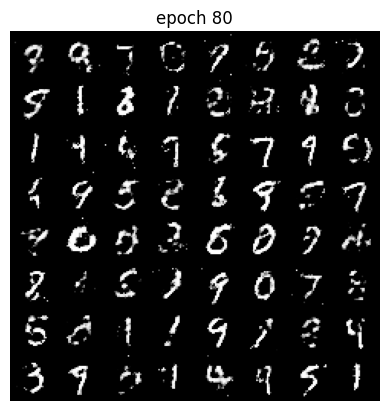

Epoch 80 of 100
Generator loss: 1.33202744, Discriminator loss: 0.57688085


469it [00:19, 24.01it/s]                         


Epoch 81 of 100
Generator loss: 1.32313846, Discriminator loss: 0.58144446


469it [00:20, 22.60it/s]                         


Epoch 82 of 100
Generator loss: 1.33374845, Discriminator loss: 0.57676944


469it [00:20, 23.40it/s]


Epoch 83 of 100
Generator loss: 1.30829160, Discriminator loss: 0.58396279


469it [00:20, 23.18it/s]                         


Epoch 84 of 100
Generator loss: 1.29056187, Discriminator loss: 0.58407224


469it [00:20, 22.52it/s]


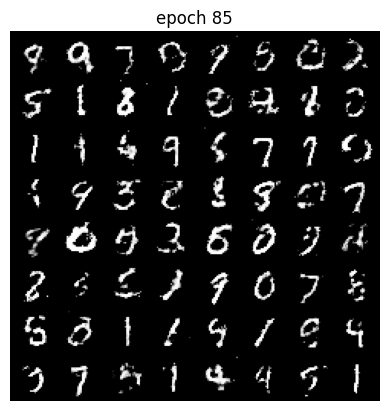

Epoch 85 of 100
Generator loss: 1.32263180, Discriminator loss: 0.58322193


469it [00:19, 23.95it/s]                         


Epoch 86 of 100
Generator loss: 1.29755496, Discriminator loss: 0.58660923


469it [00:20, 23.25it/s]


Epoch 87 of 100
Generator loss: 1.27786307, Discriminator loss: 0.58608401


469it [00:20, 22.66it/s]


Epoch 88 of 100
Generator loss: 1.26628649, Discriminator loss: 0.59203382


469it [00:19, 23.49it/s]                         


Epoch 89 of 100
Generator loss: 1.26163764, Discriminator loss: 0.59286347


469it [00:20, 22.83it/s]                         


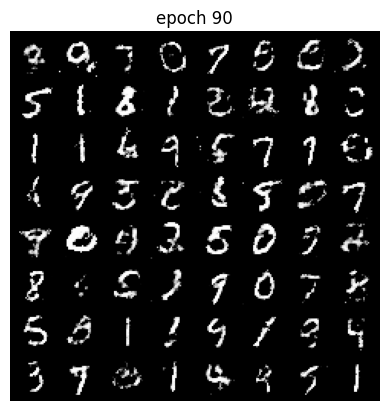

Epoch 90 of 100
Generator loss: 1.23558889, Discriminator loss: 0.59578589


469it [00:20, 23.15it/s]


Epoch 91 of 100
Generator loss: 1.25613548, Discriminator loss: 0.59240540


469it [00:20, 23.06it/s]                         


Epoch 92 of 100
Generator loss: 1.24625373, Discriminator loss: 0.59371022


469it [00:20, 22.43it/s]                         


Epoch 93 of 100
Generator loss: 1.23132055, Discriminator loss: 0.59832429


469it [00:20, 23.41it/s]                         


Epoch 94 of 100
Generator loss: 1.24170654, Discriminator loss: 0.59564141


469it [00:20, 23.08it/s]


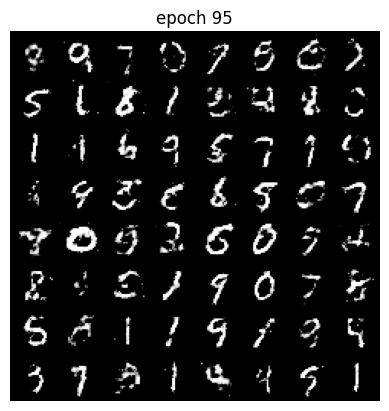

Epoch 95 of 100
Generator loss: 1.23144480, Discriminator loss: 0.59798860


469it [00:21, 22.29it/s]                         


Epoch 96 of 100
Generator loss: 1.22403888, Discriminator loss: 0.59897955


469it [00:20, 23.28it/s]                         


Epoch 97 of 100
Generator loss: 1.23777504, Discriminator loss: 0.59457122


469it [00:20, 22.43it/s]                         


Epoch 98 of 100
Generator loss: 1.22443662, Discriminator loss: 0.60204331


469it [00:20, 22.52it/s]


Epoch 99 of 100
Generator loss: 1.20623171, Discriminator loss: 0.60083731


469it [00:20, 23.34it/s]                         


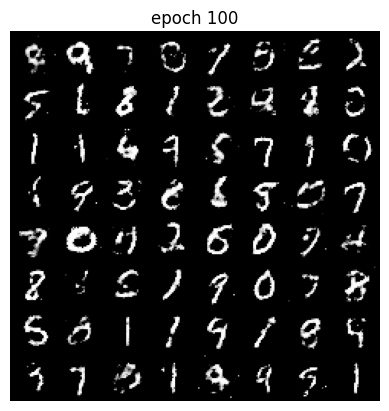

Epoch 100 of 100
Generator loss: 1.21659847, Discriminator loss: 0.59593794


In [14]:
torch.manual_seed(3476)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################

def discriminator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################


for epoch in range(epochs):
# for epoch in range(30):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
    # for bi, data in tqdm(enumerate(train_loader), total=30):
        ############ YOUR CODE HERE ##########
        realImg,_ = data
        realImg = realImg.view(-1, 28*28).to(device)

        lblR = label_real(realImg.shape[0])
        lblF = label_fake(realImg.shape[0])

        noiseSamp = create_noise(realImg.shape[0], nz)
        fakeImg = generator(noiseSamp)

        discR = discriminator(realImg)
        lossR = discriminator_loss(discR, lblR*0.9)
        discF = discriminator(fakeImg)
        lossF = discriminator_loss(discF, lblF)

        lossDiscTotal = (lossR + lossF) / 2
        loss_d += lossDiscTotal.item()

        discriminator.zero_grad()
        lossDiscTotal.backward(retain_graph = True)
        optim_d.step()

        discF_new = discriminator(fakeImg)

        lossGen = generator_loss(discF_new, lblR)
        loss_g += lossGen.item()

        generator.zero_grad()
        lossGen.backward()
        optim_g.step()

        ######################################


    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()

    # make the images as grid
    generated_img = make_grid(generated_img)

    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()

    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)

    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

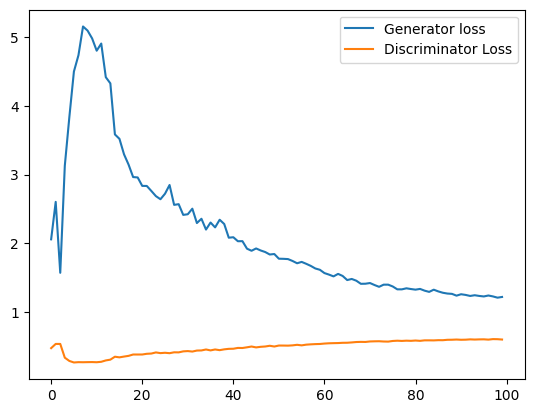

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')